In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [ ]:
data = pd.read_csv("Dataset.csv")

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokens = []
for text in data["Generation"]:
  tokens.append(tokenizer.tokenize(text))

In [ ]:
token_ids = []
for token in tokens:
  token_ids.append(tokenizer.convert_tokens_to_ids(token))

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Tokenize the text into words and sentences
feature = []
for corpus in data["Generation"]:
  words = word_tokenize(corpus)
  sentences = sent_tokenize(corpus)
  word_lengths = [len(w) for w in words if w not in stopwords.words('english')]
  avg_word_length = sum(word_lengths) / len(word_lengths)
  avg_sentence_length = len(words) / len(sentences)
  vocab = set(words)
  vocab_size = len(vocab)
  lexical_diversity = len(words) / vocab_size
  pos_tags = nltk.pos_tag(words)
  noun_count = len([w for w, pos in pos_tags if pos.startswith('NN')])
  verb_count = len([w for w, pos in pos_tags if pos.startswith('VB')])
  adj_count = len([w for w, pos in pos_tags if pos.startswith('JJ')])
  feature.append([avg_word_length, avg_sentence_length, vocab_size, lexical_diversity, noun_count, verb_count, adj_count])

In [ ]:
maxlen = 100
padded_sequences = pad_sequences(token_ids, maxlen=maxlen)

In [ ]:
feat = np.array(feature)

In [ ]:
padd = np.concatenate([padded_sequences, feat], axis = 1)

In [ ]:
labels = pd.get_dummies(data["label"]).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padd, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(tokenizer.vocab_size + 8, 128, input_length=maxlen + 7))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(11, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
235/235 [==============================] - 53s 176ms/step - loss: 1.2671 - accuracy: 0.5469 - val_loss: 0.7115 - val_accuracy: 0.7260
Epoch 2/10
235/235 [==============================] - 27s 115ms/step - loss: 0.5225 - accuracy: 0.8098 - val_loss: 0.6251 - val_accuracy: 0.7468
Epoch 3/10
235/235 [==============================] - 14s 61ms/step - loss: 0.2732 - accuracy: 0.9067 - val_loss: 0.5957 - val_accuracy: 0.7745
Epoch 4/10
235/235 [==============================] - 11s 48ms/step - loss: 0.1275 - accuracy: 0.9627 - val_loss: 0.7686 - val_accuracy: 0.7532
Epoch 5/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0777 - accuracy: 0.9777 - val_loss: 0.7392 - val_accuracy: 0.7548
Epoch 6/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0594 - accuracy: 0.9849 - val_loss: 0.8458 - val_accuracy: 0.7425
Epoch 7/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0258 - accuracy: 0.9945 - val_loss: 0.8558 - val_accuracy: 

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

74/74 [==============================] - 2s 6ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       206
           1       0.70      0.58      0.63       215
           2       0.97      0.96      0.97       211
           3       0.66      0.76      0.71       214
           4       0.70      0.77      0.73       217
           5       0.59      0.64      0.61       209
           6       0.76      0.63      0.69       213
           7       0.73      0.65      0.69       217
           8       0.72      0.77      0.74       220
           9       0.96      0.97      0.97       202
          10       0.95      0.93      0.94       222

    accuracy                           0.78      2346
   macro avg       0.79      0.79      0.78      2346
weighted avg       0.79      0.78      0.78      2346

[[200   1   1   0   0   0   0   0   0   0   4]
 [  0 125   2  42   0  13   1   0  32   0   0]
 [  3   0 203   1   0   2   2   0   0   0   0]
 [  1  19   0 163   0   5   2   0  24   0   0]

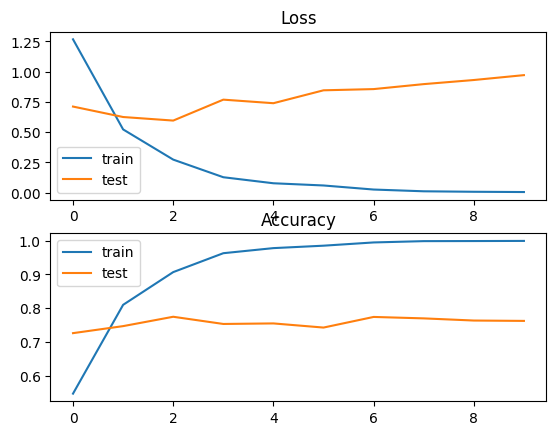

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()